In [13]:
import os
import tkinter
from tqdm import tqdm
from tkinter import filedialog
import pandas as pd
import numpy as np
import cv2
import pickle
from scipy.io import loadmat

In [3]:
# Define functions here
def search_for_file_path(prompt):

    root = tkinter.Tk()
    root.withdraw()  # use to hide tkinter window
    currdir = os.getcwd()
    file_dir = filedialog.askdirectory(
        parent=root,
        initialdir=currdir,
        title=prompt,
        mustexist=True,
    )

    return file_dir


def get_file(prompt):

    root = tkinter.Tk()
    root.withdraw()  # use to hide tkinter window
    currdir = os.getcwd()
    files = filedialog.askopenfilenames(
        parent=root,
        initialdir=currdir,
        title=prompt,
        filetypes=[("mat files", ".mat")],
    )

    return files

In [4]:
pkl_dir = search_for_file_path("Select the directory containing the pkl meaning map files:")

In [5]:
mat_dir = search_for_file_path("Select the directory containing the meaning map mat files:")

In [6]:
pkl_files = os.listdir(pkl_dir)
pkl_files

['180_bust.pkl',
 '180_airport.pkl',
 '180_child_bedroom.pkl',
 '180_blender.pkl',
 '180_computer.pkl',
 '180_coke_can.pkl',
 '180_chainsaw.pkl',
 '180_bowl.pkl',
 '180_clock.pkl',
 '180_chair.pkl',
 '180_blue_river.pkl',
 '180_candy_store.pkl',
 '180_basketball_net.pkl',
 '180_coffeemaker.pkl',
 '180_boat.pkl',
 '180_car.pkl',
 '180_cap.pkl',
 '180_cracker.pkl',
 '180_cat.pkl',
 '180_arcade.pkl',
 '180_brick_apartment.pkl',
 '180_briefcase.pkl',
 '180_dice.pkl',
 '180_bell.pkl',
 '180_CD.pkl',
 '180_calculator.pkl',
 '180_bongo_drums.pkl',
 '180_bucket.pkl',
 '180_dog.pkl',
 '180_bin.pkl',
 '180_disco_ball.pkl',
 '180_broom.pkl',
 '180_book.pkl']

In [7]:
mat_files = os.listdir(mat_dir)
mat_files

['180_bongo_drums.mat',
 '180_cap.mat',
 '180_blue_river.mat',
 '180_cat.mat',
 '180_bucket.mat',
 '180_dog.mat',
 '180_arcade.mat',
 '180_bin.mat',
 '180_child_bedroom.mat',
 '180_clock.mat',
 '180_CD.mat',
 '180_bust.mat',
 '180_coffeemaker.mat',
 '180_bell.mat',
 '180_airport.mat',
 '180_car.mat',
 '180_disco_ball.mat',
 '180_boat.mat',
 '180_basketball_net.mat',
 '180_book.mat',
 '180_chair.mat',
 '180_chainsaw.mat',
 '180_brick_apartment.mat',
 '180_cracker.mat',
 '180_bowl.mat',
 '180_calculator.mat',
 '180_coke_can.mat',
 '180_candy_store.mat',
 '180_broom.mat',
 '180_briefcase.mat',
 '180_dice.mat',
 '180_blender.mat',
 '180_computer.mat']

In [45]:
files = tqdm(pkl_files)
corr_list = []
for file in files:
    files.set_description(f"Validating meaning maps for: {file}")
    with open (os.path.join(pkl_dir, file), "rb") as f:
        pkl_vals = pickle.load(f)
        pkl_arr = pkl_vals.ravel()
    # Load the mat file
    mat_vals = loadmat(os.path.join(mat_dir, file[:-4]+'.mat'))['smooth_meaning']
    mat_arr = mat_vals.ravel()
    corr = np.corrcoef(pkl_arr, mat_arr)
    corr_list.append(corr[0, 1])

Validating meaning maps for: 180_book.pkl: 100%|██████████| 33/33 [00:20<00:00,  1.64it/s]           


In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

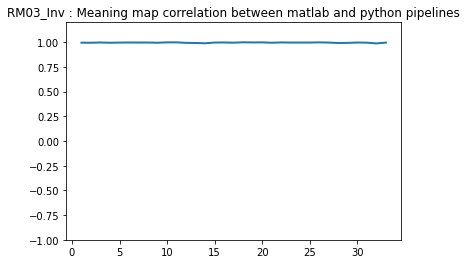

In [50]:
ax = plt.subplot(111)
  
img_num = np.arange(1, len(corr_list)+1)
line, = plt.plot(img_num, corr_list, lw = 2)
  
plt.ylim(-1, 1.2)
plt.title("RM03_Inv : Meaning map correlation between matlab and python pipelines")
plt.show()